In [26]:
#Exploring the files created by Helen Seroussi for ISMIP6, as part of CMIP6 hackathon paper
#Author S Buzzard 
#Last modified 30/09/21

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from pathlib import Path

#SMB files are in kg/s, total files are in Gt
#Convert SMB- multiply by 31536000 (seconds in a yr), divide by 1000000000000 (kg in a Gt)? (=mutiply by .000031536)
#Check these units, it's suggesting dynamic is way more important
#Match up experiments to ssps- convert to temperature changes to plot response to temp change vs temp change

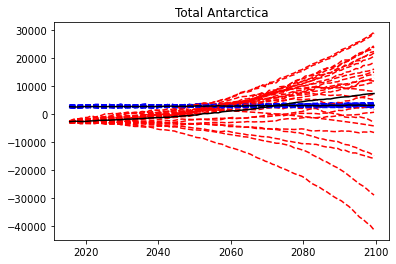

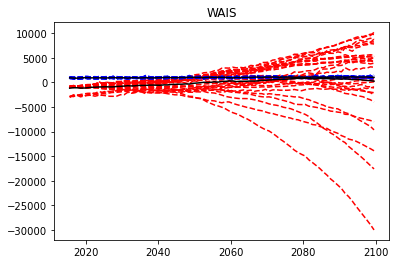

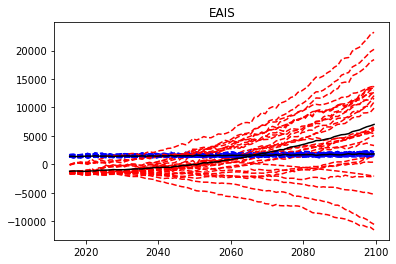

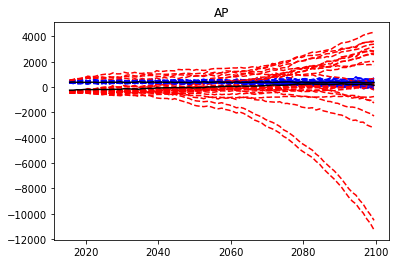

In [22]:
#Total Antarctica
smb_mean=[]
dyn_mean=[]

for model in ('AWI_PISM1','ILTS_PIK_SICOPOLIS1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM', 'VUB_AISMPALEO'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_all=ds['smb'][:85]*.000031536
                smb_mean.append(smb_all)

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_all=ds['limnsw_total_antarctica'][:85]-smb_all
                dyn_mean.append(dyn_all)

                plt.plot(time,smb_all,'b--')
                plt.plot(time,dyn_all,'r--')
                
plt.plot(time,np.average(smb_mean, axis=0),'k')
plt.plot(time,np.average(dyn_mean, axis=0),'k')
plt.title('Total Antarctica')
plt.show()

#By regions
#Region 1 is WAIS, 2 is EAIS and 3 is AP
region_names=['WAIS','EAIS','AP']
for region in range(1,4):
    smb_mean=[]
    dyn_mean=[]
    for model in ('AWI_PISM1','ILTS_PIK_SICOPOLIS1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM', 'VUB_AISMPALEO'):
            for exp in (1,3,4,5,6,8,9,10):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb=ds['smb_region_'+str(region)][:85]*.000031536
                    smb_mean.append(smb)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn=ds['limnsw_region_'+str(region)][:85]-smb
                    dyn_mean.append(dyn)


                    plt.plot(time,smb,'b--')
                    plt.plot(time,dyn,'r--')

    plt.plot(time,np.average(smb_mean, axis=0),'k')
    plt.plot(time,np.average(dyn_mean, axis=0),'k')
    plt.title(region_names[region-1])
    plt.show()



In [12]:
ds['limnsw_region_'+str(region)].units

<ipython-input-12-1a23893c0735>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ds['limnsw_region_'+str(region)].units


'Gt'

In [25]:
31536000

31536000